<a href="https://colab.research.google.com/github/katafuchix/at_it_stock_python/blob/main/Ch3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas_datareader.data as pdr

def get_stock_data(code):
  df = pdr.DataReader("{}.JP".format(code), "stooq").sort_index()
  return df

In [ ]:
pip install mplfinance

In [ ]:
!wget http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz
!tar -xzvf ta-lib-0.4.0-src.tar.gz
!cd ta-lib && ./configure --prefix=/usr && make && make install
!pip install Ta-Lib

In [ ]:
df = get_stock_data(6670)

In [ ]:
import talib as ta

df = get_stock_data(6670)  # (株)MCJ(6670)の株価を取得

# 終値からMACDを計算
close = df['Close']           
macd, macdsignal, _ = ta.MACD(close,
                                     fastperiod=12, slowperiod=26, signalperiod=9)
df['macd'] = macd
df['macd_signal'] = macdsignal
df.tail()

,Open,High,Low,Close,Volume,macd,macd_signal
Date,,,,,,,
2021-08-05,1234.0,1236.0,1214.0,1220.0,565700,6.144799,24.295776
2021-08-06,1190.0,1252.0,1183.0,1231.0,698900,2.547708,19.946163
2021-08-10,1215.0,1235.0,1161.0,1167.0,413000,-5.404973,14.875935
2021-08-11,1158.0,1164.0,1122.0,1144.0,474600,-13.408868,9.218975
2021-08-12,1154.0,1170.0,1150.0,1167.0,237300,-17.692161,3.836748


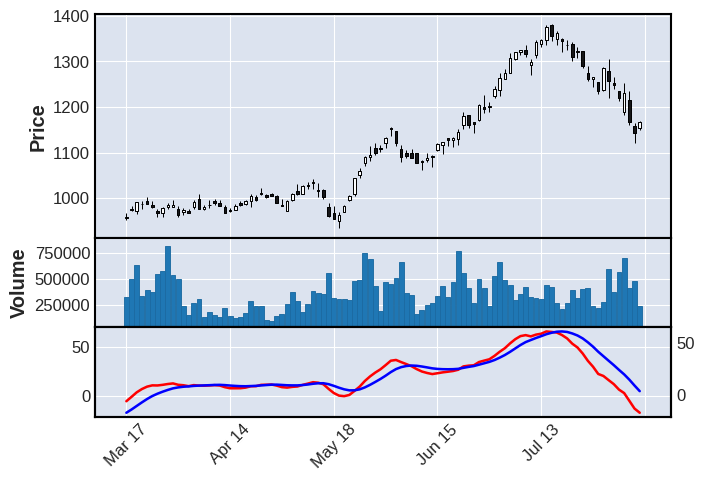

In [ ]:
import mplfinance as mpf
mdf = df.tail(100) # 直近100日分のデータ
apd  = [
    mpf.make_addplot(mdf['macd'], panel=2, color='red'),# パネルの2番地に赤で描画
    mpf.make_addplot(mdf['macd_signal'], panel=2, color='blue'), 
]
mpf.plot(mdf, type='candle', volume=True, addplot=apd)

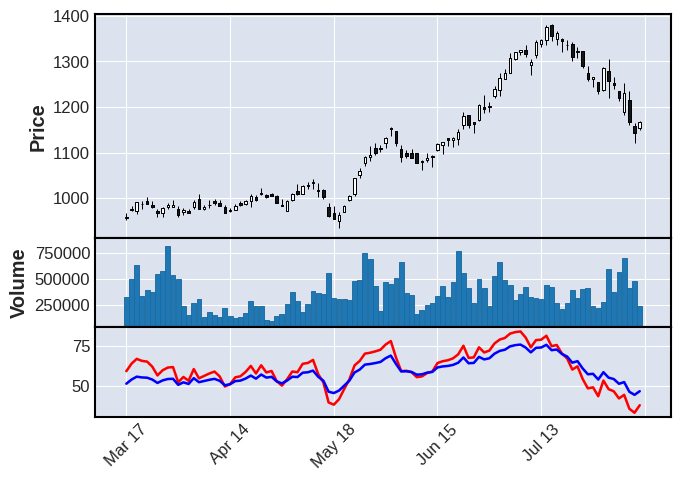

In [ ]:
rsi14 = ta.RSI(close, timeperiod=14)
rsi28 = ta.RSI(close, timeperiod=28)
df['rsi14'], df['rsi28'] = rsi14, rsi28

mdf = df.tail(100)
apd  = [
    mpf.make_addplot(mdf['rsi14'], panel=2, color='red'),
    mpf.make_addplot(mdf['rsi28'], panel=2, color='blue')
]
mpf.plot(mdf, type='candle', volume=True, addplot=apd)

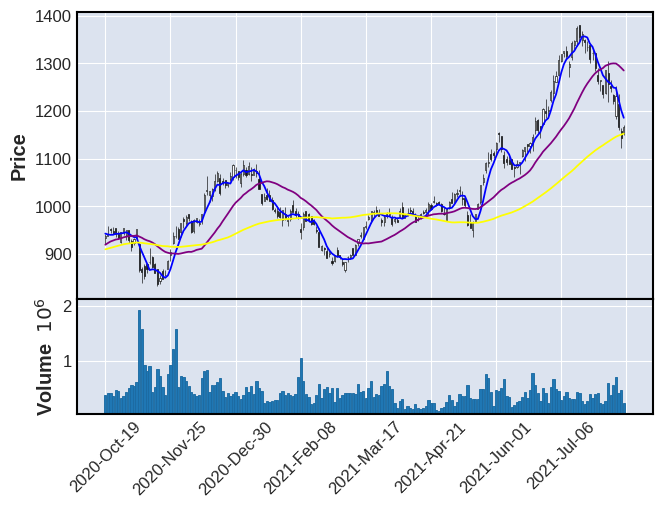

In [ ]:
ma5, ma25, ma75  = ta.SMA(close, timeperiod=5), ta.SMA(close, timeperiod=25), ta.SMA(close, timeperiod=75)
df['ma5'], df['ma25'], df['ma75'] = ma5, ma25, ma75

mdf = df.tail(200)

apd  = [
    mpf.make_addplot(mdf['ma5'], panel=0, color='blue'),
    mpf.make_addplot(mdf['ma25'], panel=0, color='purple'),
    mpf.make_addplot(mdf['ma75'], panel=0, color='yellow'),
]
mpf.plot(mdf, type='candle', volume=True, addplot=apd)

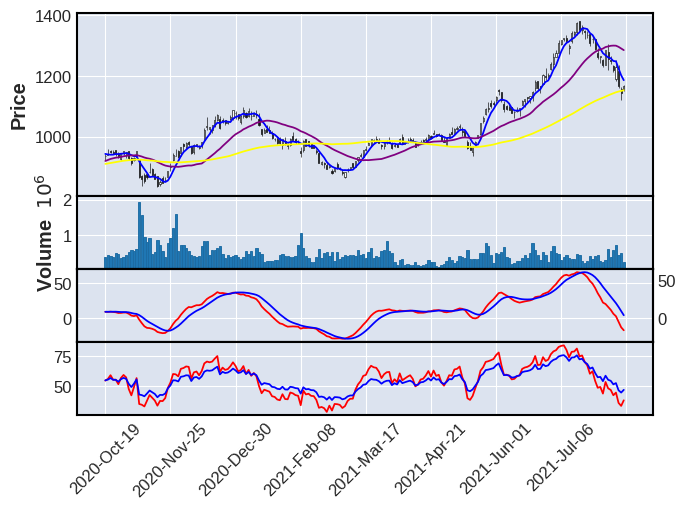

In [ ]:
mdf = df.tail(200)
apd  = [
    mpf.make_addplot(mdf['ma5'], panel=0, color='blue'),
    mpf.make_addplot(mdf['ma25'], panel=0, color='purple'),
    mpf.make_addplot(mdf['ma75'], panel=0, color='yellow'),
    mpf.make_addplot(mdf['macd'], panel=2, color='red'),
    mpf.make_addplot(mdf['macd_signal'], panel=2, color='blue'),
    mpf.make_addplot(mdf['rsi14'], panel=3, color='red'),
    mpf.make_addplot(mdf['rsi28'], panel=3, color='blue')
]
mpf.plot(mdf, type='candle', volume=True, addplot=apd)